# Attention with hidden state vectors

In [814]:
import torch

In [815]:
seq_len = 4
hidden_dim = 3

In [816]:
x = torch.randn(seq_len, hidden_dim)
print(x.shape)
x

torch.Size([4, 3])


tensor([[ 0.3566,  0.1683, -0.9625],
        [-0.3791, -0.7613, -0.5214],
        [-0.5634,  0.2771,  0.5368],
        [-0.4281, -0.0253,  0.8345]])

In [817]:
x = x.repeat(seq_len, 1, 1)
print(x.shape)

torch.Size([4, 4, 3])


In [818]:
mask = torch.triu(torch.ones(x.shape[-1], x.shape[0], x.shape[0]))
mask

tensor([[[1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 0., 1., 1.],
         [0., 0., 0., 1.]],

        [[1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 0., 1., 1.],
         [0., 0., 0., 1.]],

        [[1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 0., 1., 1.],
         [0., 0., 0., 1.]]])

In [819]:
masked = torch.mul(mask, x.transpose(0, -1))
print(masked.shape)
masked.transpose(0, -1)

torch.Size([3, 4, 4])


tensor([[[ 0.3566,  0.1683, -0.9625],
         [-0.0000, -0.0000, -0.0000],
         [-0.0000,  0.0000,  0.0000],
         [-0.0000, -0.0000,  0.0000]],

        [[ 0.3566,  0.1683, -0.9625],
         [-0.3791, -0.7613, -0.5214],
         [-0.0000,  0.0000,  0.0000],
         [-0.0000, -0.0000,  0.0000]],

        [[ 0.3566,  0.1683, -0.9625],
         [-0.3791, -0.7613, -0.5214],
         [-0.5634,  0.2771,  0.5368],
         [-0.0000, -0.0000,  0.0000]],

        [[ 0.3566,  0.1683, -0.9625],
         [-0.3791, -0.7613, -0.5214],
         [-0.5634,  0.2771,  0.5368],
         [-0.4281, -0.0253,  0.8345]]])

In [820]:
attention_dim = 2
w_a = torch.randn(hidden_dim, attention_dim)
tanh = torch.nn.Tanh()
key = tanh(torch.matmul(masked.transpose(0, -1), w_a))
print(key.shape)
key

torch.Size([4, 4, 2])


tensor([[[-0.8946,  0.4319],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.8946,  0.4319],
         [-0.8556,  0.6903],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[-0.8946,  0.4319],
         [-0.8556,  0.6903],
         [ 0.1891, -0.1845],
         [ 0.0000,  0.0000]],

        [[-0.8946,  0.4319],
         [-0.8556,  0.6903],
         [ 0.1891, -0.1845],
         [ 0.7827, -0.3604]]])

In [821]:
softmax = torch.nn.Softmax(dim=-1)
q = torch.randn(1, attention_dim)
temp = torch.matmul(q, key.transpose(1, 2))
print(temp.shape)
temp

torch.Size([4, 1, 4])


tensor([[[-0.4003,  0.0000,  0.0000,  0.0000]],

        [[-0.4003, -0.2373,  0.0000,  0.0000]],

        [[-0.4003, -0.2373,  0.0357,  0.0000]],

        [[-0.4003, -0.2373,  0.0357,  0.3594]]])

In [822]:
softmax_mask = ((torch.tril(torch.ones(temp.shape[0], temp.shape[0]), diagonal=0) != 1) * -float('inf')).nan_to_num(nan=0)
softmax_mask = softmax_mask.unsqueeze(1)
softmax_mask

tensor([[[ 0.0000e+00, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00, -3.4028e+38, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00, -3.4028e+38]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [823]:
temp = temp + softmax_mask
temp

tensor([[[-4.0035e-01, -3.4028e+38, -3.4028e+38, -3.4028e+38]],

        [[-4.0035e-01, -2.3730e-01, -3.4028e+38, -3.4028e+38]],

        [[-4.0035e-01, -2.3730e-01,  3.5651e-02, -3.4028e+38]],

        [[-4.0035e-01, -2.3730e-01,  3.5651e-02,  3.5940e-01]]])

In [824]:
d = softmax(temp)
print(d.shape)
d.squeeze()

torch.Size([4, 1, 4])


tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4593, 0.5407, 0.0000, 0.0000],
        [0.2686, 0.3161, 0.4153, 0.0000],
        [0.1706, 0.2008, 0.2638, 0.3647]])

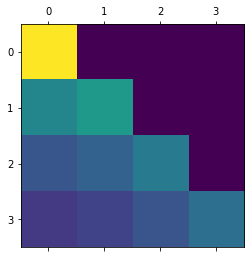

In [825]:
import matplotlib.pyplot as plt
plt.matshow(d.squeeze())
plt.show()

In [826]:
a = torch.matmul(d, masked.unsqueeze(-1)).transpose(0, 1)
print(a.shape)
a.squeeze()

torch.Size([4, 3, 1, 1])


tensor([[ 0.3566,  0.1683, -0.9625],
        [-0.2050, -0.4116, -0.2819],
        [-0.2340,  0.1151,  0.2229],
        [-0.1561, -0.0092,  0.3044]])